## Objective Function:

Maximizing the revenue, given as the difference between the reward (profit) and the cost per click times the clicks ( costs ). 

It can be expressed as :
### $$ max_{price,bid}( \sum \limits_{C_i} (price \times soldItems(bid_i, price)) - (clicks(bidi) \times costPerClick(bid_i))) $$


with the following constraints:
$$ price >= 3  $$
$$ price <= 15  $$
$$ 0 < bid_i < 10  \hspace{5mm} \forall i $$
$$ bid - \sum(costPerClicks) <= dailyBudget  $$


The last constraint is not needed due to the missing of a limited budget. 
    




### Customer Classes  ids :
 
    - Class 0  =  Wealthy and frequent buyer 
    - Class 1  =  Wealthy and not frequent  
    - Class 2  =  Frequent, but "smart"


In [1]:
from customerManager import CustomerManager
import matplotlib.pyplot as plt
import numpy as np
customer_path = "./config/customer_classes.json"
cManager = CustomerManager(file_path = customer_path)

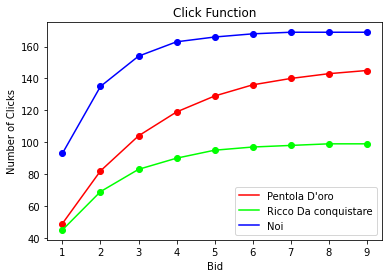

In [2]:


#Data Generation
X = np.arange(1,10)
Y = []
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.clicks(c["class_id"], bid = x, noise = False)) 


#Plotting of click function
plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot(X, Y[c["class_id"]], color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X, Y[c["class_id"]], color=colors[c["class_id"]])
    plt.title("Click Function")
    plt.xlabel("Bid")
    plt.ylabel("Number of Clicks")


plt.legend()
plt.show()


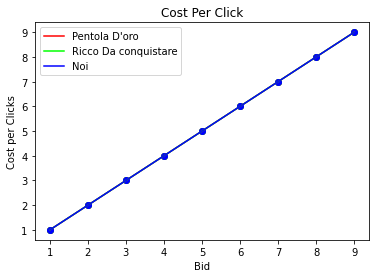

In [3]:
import matplotlib.pyplot as plt
import numpy as np


#Data Generation
X = np.arange(1, 10)
Y = []
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.cost_per_click(c["class_id"], bid = x, noise = False)) 


#Plotting 
plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot(X, Y[c["class_id"]], color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X, Y[c["class_id"]], color=colors[c["class_id"]])
    plt.title("Cost Per Click")
    plt.xlabel("Bid")
    plt.ylabel("Cost per Clicks")


plt.legend()
plt.show()

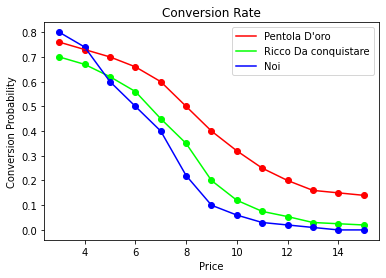

In [4]:
import matplotlib.pyplot as plt
import numpy as np


#Plotting 
plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot([i[0] for i in c["conversion_rate_matrix"]],
             [i[1] for i in c["conversion_rate_matrix"]], 
             color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter([i[0] for i in c["conversion_rate_matrix"]],
                [i[1] for i in c["conversion_rate_matrix"]],
                color=colors[c["class_id"]])
    plt.title("Conversion Rate")
    plt.xlabel("Price")
    plt.ylabel("Conversion Probability")


plt.legend()
plt.show()

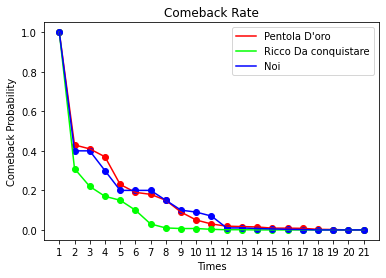

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]

X = np.arange(1, 22)
Y = []


#Data Generation
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.comeback_probability(c["class_id"], times = x, noise = False)) 



#Plotting 
for c in cManager.classes:    
    plt.xticks(X)
    plt.plot(X,
             Y[c["class_id"]], 
             color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X,
                Y[c["class_id"]], 
                color=colors[c["class_id"]])
    plt.title("Comeback Rate")
    plt.xlabel("Times")
    plt.ylabel("Comeback Probability")


plt.legend()
plt.show()
